In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Ash Alcalinity', 'Magnesium', 'Total Phenols', \
           'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', \
           'Dilution', 'Proline']
wine_path = 'wine.data.txt'
wine_df = pd.read_csv(wine_path, names=names)

In [10]:
wine_df.shape

(178, 14)

In [11]:
index_1s = wine_df['Class'] == 1
index_2s = wine_df['Class'] == 2

In [12]:
wine_df = wine_df.loc[index_1s | index_2s]

In [13]:
wine_df.shape

(130, 14)

In [14]:
X = wine_df.drop('Class',axis=1)
y = wine_df['Class']

In [15]:
wine_df.head()

,Class,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
X.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,12.944077,1.968077,2.340462,18.785385,99.900000,2.522692,2.490000,0.330231,1.752385,4.194769,1.058892,2.954385,790.092308
std,0.888769,0.879968,0.297162,3.400459,15.381379,0.545393,0.737765,0.109087,0.539572,1.625782,0.168690,0.475166,352.513026
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,12.227500,1.510000,2.170000,16.525000,88.000000,2.147500,2.002500,0.260000,1.422500,2.862500,0.940000,2.732500,474.000000
50%,13.010000,1.730000,2.320000,18.550000,98.000000,2.560000,2.565000,0.300000,1.705000,3.870000,1.050000,2.980000,716.000000
75%,13.727500,2.057500,2.527500,20.950000,108.000000,2.937500,2.997500,0.397500,2.005000,5.375000,1.167500,3.300000,1063.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,8.900000,1.710000,4.000000,1680.000000


In [17]:
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=names[1:])
X_std.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
mean,7.651999e-16,1.708035e-17,2.732857e-16,1.639714e-16,-3.825999e-16,-1.639714e-16,2.732857e-16,-3.825999e-16,-8.198570e-17,2.732857e-16,-6.046445e-16,9.018427e-16,-1.093143e-16
std,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00
min,-2.161957e+00,-1.400991e+00,-3.312182e+00,-2.416453e+00,-1.951429e+00,-2.618653e+00,-2.612521e+00,-1.842617e+00,-2.497495e+00,-1.799777e+00,-2.195268e+00,-2.882492e+00,-1.458310e+00
25%,-8.093764e-01,-5.225744e-01,-5.758509e-01,-6.673009e-01,-7.766557e-01,-6.905910e-01,-6.633354e-01,-6.462964e-01,-6.137474e-01,-8.226336e-01,-7.075249e-01,-4.687685e-01,-9.001514e-01
50%,7.446037e-02,-2.715983e-01,-6.912290e-02,-6.948922e-02,-1.240038e-01,6.866973e-02,1.020516e-01,-2.781977e-01,-8.815866e-02,-2.005346e-01,-5.291788e-02,5.411680e-02,-2.109963e-01
75%,8.848793e-01,1.020139e-01,6.318509e-01,6.390283e-01,5.286480e-01,7.635083e-01,6.905492e-01,6.190429e-01,4.699887e-01,7.287547e-01,6.463214e-01,7.301706e-01,7.793083e-01
max,2.130157e+00,4.371460e+00,3.005027e+00,3.310730e+00,4.052968e+00,2.498304e+00,3.524182e+00,3.034691e+00,3.400262e+00,2.905329e+00,3.874724e+00,2.209038e+00,2.534233e+00


In [18]:
X_std.shape

(130, 13)

In [19]:
X_train=X_std.as_matrix()
Y_train=y.as_matrix()

In [20]:
cov=np.cov((X_train).T)

In [21]:
cov.shape

(13, 13)

In [22]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(cov)

In [23]:
eig_vec=np.real(eig_vec)

eig_val=np.real(eig_val)


In [24]:
eig_vec.shape

(13, 13)

In [25]:
sorted_eig_val=np.sort(eig_val)[::-1]
index_sorted_eig_val=np.argsort(eig_val)[::-1]

In [26]:
cumilative_sorted_eig_val=np.cumsum(sorted_eig_val)
norm_cumilative_sorted_eig_val=cumilative_sorted_eig_val/(max(cumilative_sorted_eig_val))

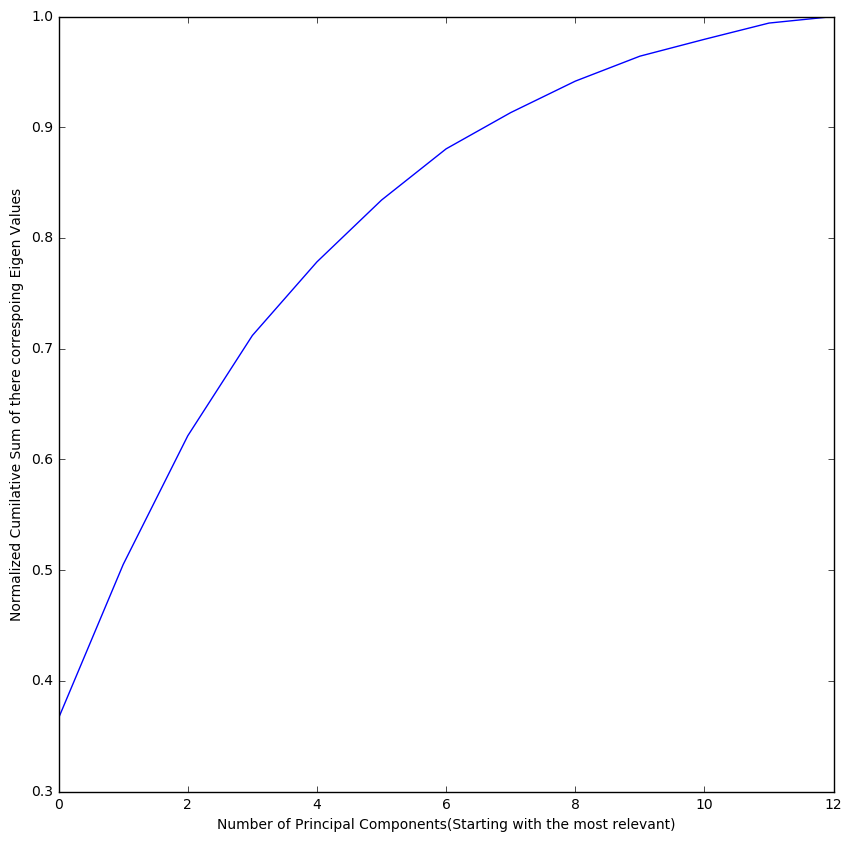

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(range(len(norm_cumilative_sorted_eig_val)), norm_cumilative_sorted_eig_val)
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

In [28]:
pca_components=eig_vec[:,index_sorted_eig_val[0]]
for i in range(len(eig_val)-1):
    pca_components=np.column_stack((pca_components,eig_vec[:,index_sorted_eig_val[i+1]]))

In [29]:
pca_components.shape

(13, 13)

In [30]:
X_train_mean=(X_train.T).mean(1)

In [31]:
error_reconstructions=[]
n = 13
for i in range(n):
    temp=sorted_eig_val
    error=sum(temp[i+1:])
    error_reconstructions.append(error)

In [32]:
len(error_reconstructions)

13

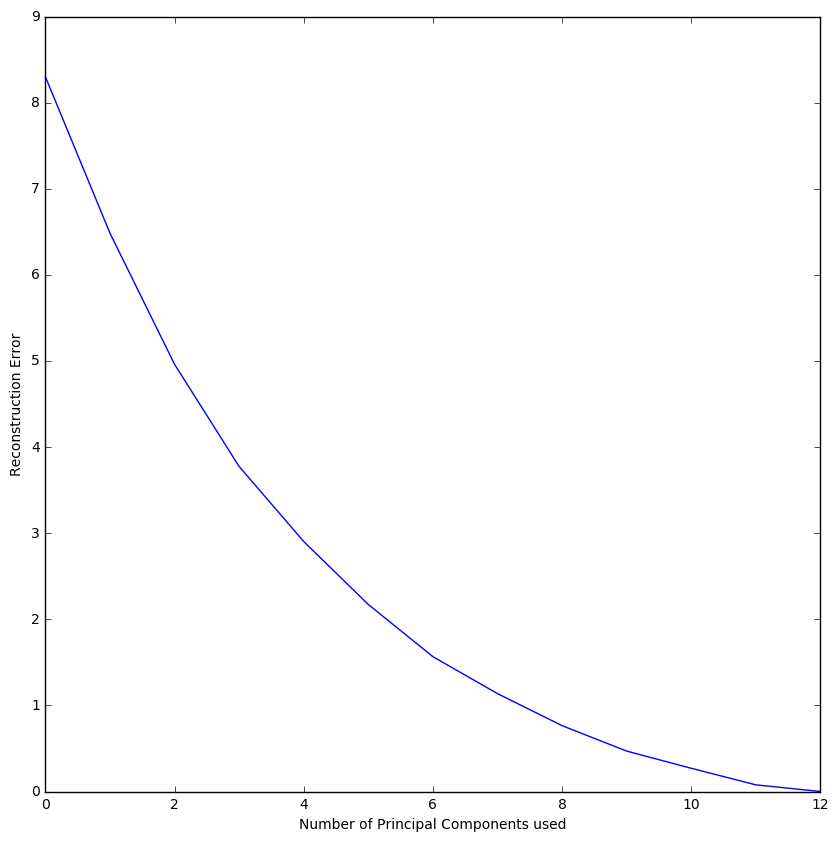

In [33]:
plt.figure(figsize=(10,10))
plt.plot(range(13), error_reconstructions)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

In [34]:
n=7
#number of Principal components
temp=np.array([(X_train[i,:].T-X_train_mean) for i in range(len(X_train))])
X_train_classifier=temp.dot(pca_components[:,0:n])

In [35]:
X_train_classifier.shape

(130, 7)

In [36]:
index_1s = Y_train == 1
index_2s = Y_train == 2

data_1 = X_train_classifier[index_1s]
data_2 = X_train_classifier[index_2s]


data_1=data_1[:,0:784]
data_2=data_2[:,0:784]

X_train_classifier_mean=(X_train_classifier.T).mean(1)

data_1_mean=(data_1.T).mean(1)
data_2_mean=(data_2.T).mean(1)

cov_classifier=np.cov((X_train_classifier).T)

cov_1=np.cov((data_1).T)
cov_2=np.cov((data_2).T)

S_W=cov_1+cov_2

temp=(data_1_mean-X_train_classifier_mean)
temp=np.reshape(temp,(temp.size,1))
temp=temp.dot(temp.T)
temp=len(data_1)*temp

temp1=(data_2_mean-X_train_classifier_mean)
temp1=np.reshape(temp1,(temp1.size,1))
temp1=temp1.dot(temp1.T)
temp1=len(data_2)*temp1

S_B=temp1 + temp




In [37]:
from numpy.linalg import inv
LDA_matrix=inv(S_W).dot(S_B)

In [38]:
from numpy import linalg as LA
LDA_eig_val, LDA_eig_vec = LA.eig(LDA_matrix)

In [39]:
LDA_eig_vec=np.real(LDA_eig_vec)
LDA_eig_val=np.real(LDA_eig_val)

In [40]:
LDA_sorted_eig_val=np.sort(LDA_eig_val)[::-1]
LDA_index_sorted_eig_val=np.argsort(LDA_eig_val)[::-1]

In [41]:
LDA_sorted_eig_val

array([  3.10025797e+02,   3.05233203e-15,   2.82763870e-16,
        -3.64119548e-16,  -3.15961324e-15,  -3.15961324e-15,
        -4.17160073e-14])

In [42]:
LDA_X_train_classifier=X_train_classifier.dot(LDA_eig_vec[:,LDA_index_sorted_eig_val[0]])

In [43]:
LDA_X_train_classifier.shape

(130,)

In [44]:
Y = np.reshape(Y_train,(len(Y_train),1))
print(Y.shape)
LDA_X_train_classifier = np.reshape(LDA_X_train_classifier, (len(LDA_X_train_classifier), 1))
lda_data = np.hstack((Y,LDA_X_train_classifier))
print(lda_data.shape)

(130, 1)
(130, 2)


In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import random
import math
import statistics
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools

In [46]:
def loadCSV(filename):
    lines = csv.reader(open(filename))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [47]:
def makeBinary(dataset, labels):
    new = []
    for i in range(len(dataset)):
        vector = dataset[i]
        if any (vector[0] == label  for label in labels):
            new.append(vector)
    return new

In [48]:
def takePredefinedNoSamplesTrain(dataset, number, labels):
    new = []
    new1 = []
    copy = []
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[0] == labels[0]:
            copy.append(vector)
            
    while len(new) < number:
        index = random.randrange(len(copy))
        vector = copy[index]
        new.append(copy.pop(index))
        
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[0] == labels[1]:
            new1.append(vector)
            copy.append(vector)
    
    while len(new) < 2*number:
        index = random.randrange(len(new1))
        vector = new1[index]
        new.append(new1.pop(index))
        copy.remove(vector)
        
    return [new, copy] 

In [49]:
def prepareCrossValidationSets(dataset, ratio):
    data = {}
    i = 0
    trainSize = int(len(dataset))*ratio
    for i in range(10):
        trainset = []
        copy = list(dataset)
        while len(trainset) < trainSize:
            data[i] = []
            index = random.randrange(len(copy))
            trainset.append(copy.pop(index))
            data[i].append(trainset)
            data[i].append(copy)
        i= i+1
    return data

In [50]:
def calculatePrior(dataset, labels):
    label = labels[1]
    total = len(dataset)
    X = np.asarray(dataset)
    X = X[:,:1]
    X = X.flatten()
    X = X.tolist()
    prior = X.count(float(label))
    prior = prior/total
    return prior

In [51]:
def doStandardScaling(dataset):
    dataset = np.asarray(dataset)
    labels  = dataset[:,:1]
    features = dataset[:,1:]
    X_r = pd.DataFrame(StandardScaler().fit_transform(features))
    X=np.append(labels,X_r, axis = 1)
    data = X.tolist()
    return data

In [52]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[0] not in separated):
            separated[vector[0]] = []
        separated[vector[0]].append(vector)
    return separated

In [53]:
def varianceFeatures(dataset):
    var = []
    for attribute in zip(*dataset):
        var.append(statistics.variance(attribute))
    del var[0]
    return var

In [54]:
def meanFeatures(dataset):
    meanFeatures = [(statistics.mean(attribute)) for attribute in zip(*dataset)]
    del meanFeatures[0]
    return meanFeatures

In [55]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    meanFeaturesClass = {}
    for classValue, instances in separated.items():
        meanFeaturesClass[classValue] = meanFeatures(instances)  
    return meanFeaturesClass

In [56]:
def calculateWeights(mean, variance):
    weights = []
    for index in range (len(variance)):
        weights.append((mean[1][index] - mean[2][index])/(variance[index]))
    return weights

In [57]:
def calculateWeightZero(prior, mean, variance):
    weightZero = math.log((1-prior)/prior)
    for i in range(len(variance)):
        weightZero = weightZero + ((mean[1][i]*mean[1][i] - mean[2][i]*mean[2][i])/(2*variance[i]))
    return weightZero

In [58]:
def calculatePosteriorProbabilities(weight0, weights, inputVector):
    labels = [1.0,2.0]
    prob = {}
    prob[labels[0]] = []
    prob[labels[1]] = []
    numerator = 0
    for i in range(len(weights)):
        numerator = numerator +  weights[i]*inputVector[i+1]
    num = math.exp(weight0 + numerator)
    prob[labels[0]].append((num/(1+num)))
    prob[labels[1]].append(1/(1+num))    
    return prob

In [59]:
def predict(weight0, weights, inputVector):
    probs = calculatePosteriorProbabilities(weight0, weights, inputVector)
    bestLabel, bestProb = None, -1
    for label, p in probs.items():
        if bestLabel is None or p > bestProb:
            bestProb = p
            bestLabel = label
    return bestLabel

In [60]:
def getPredictions(weight0, weights, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(weight0, weights, testSet[i])
        predictions.append(result)
    return predictions

In [61]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][0] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Using Wine dataset
With 5 samples for each class
130 10 120
Accuracy score:
99.16666666666667
Confusion matrix
[[54  0]
 [ 1 65]]


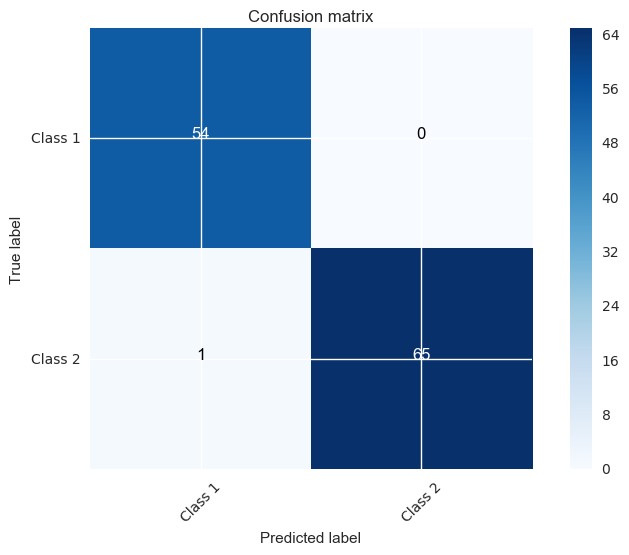

Split rows into train and test rows
130 100 30
Accuracy Score:
100.0
Confusion matrix
[[ 9  0]
 [ 0 21]]


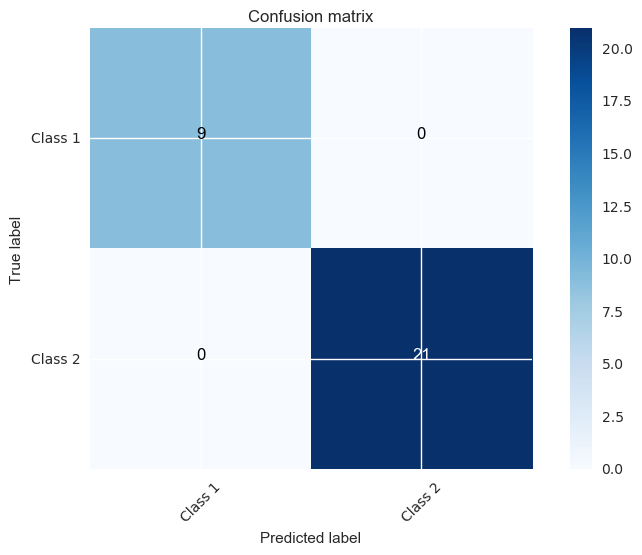

10 - fold cross Validation
K- Validation Accuracy- Scores
[100.0, 100.0, 100.0, 100.0, 100.0, 92.3076923076923, 100.0, 100.0, 100.0, 100.0]
Average
99.23076923076923


In [63]:
print('Using Wine dataset')
    #filename = 'wine.data.txt'
    #dataset = loadCSV(filename)
    #select first two classes
labels = [1,2]
    
dataset = makeBinary(lda_data, labels)
    #print(dataset)
dataset = doStandardScaling(dataset)
    #print(dataset)
trainingSet, testSet = takePredefinedNoSamplesTrain(dataset, 5, labels)
print('With 5 samples for each class')
print(len(dataset), len(trainingSet), len(testSet))
  
    # prepare model
summaries = summarizeByClass(trainingSet)
var = varianceFeatures(dataset)
prior = calculatePrior(trainingSet, labels)
weights = calculateWeights(summaries, var)
weight0 = calculateWeightZero(prior, summaries, var)
predictions = getPredictions(weight0, weights, testSet)
accuracy1 = getAccuracy(testSet, predictions)
   
print('Accuracy score:')
print(accuracy1)
    
Y = np.asarray(testSet)
Y = Y[:,:1]
Y_test = Y.tolist()
accuracy = confusion_matrix(Y_test,predictions)
classes = ['Class 1', 'Class 2']
plt.figure()
plot_confusion_matrix(accuracy, classes=classes,title='Confusion matrix')
plt.show()
    
    
    
    

    
trainingSet, testSet = takePredefinedNoSamplesTrain(dataset, 50, labels)
   
print('Split rows into train and test rows')
print(len(dataset), len(trainingSet), len(testSet))
    
    
summaries = summarizeByClass(trainingSet)
var = varianceFeatures(dataset)
prior = calculatePrior(trainingSet, labels)
weights = calculateWeights(summaries, var)
weight0 = calculateWeightZero(prior, summaries, var)
predictions = getPredictions(weight0, weights, testSet)
accuracy2 = getAccuracy(testSet, predictions)
    
    
   
    
    
print('Accuracy Score:')
print(accuracy2)
    
    
    
Y = np.asarray(testSet)
Y = Y[:,:1]
Y_test = Y.tolist()
accuracy = confusion_matrix(Y_test,predictions)
classes = ['Class 1', 'Class 2']
plt.figure()
plot_confusion_matrix(accuracy, classes=classes,title='Confusion matrix')
plt.show()
    
    
print('10 - fold cross Validation')
data = prepareCrossValidationSets(dataset, 0.9)
KAccuracy = []
index = 0
for i in range(10):
    trainingSet = data[index][0]
    testSet = data[index][1]   
        # prepare model
    summaries = summarizeByClass(trainingSet)
    var = varianceFeatures(dataset)
    prior = calculatePrior(trainingSet, labels)
    weights = calculateWeights(summaries, var)
    weight0 = calculateWeightZero(prior, summaries, var)
    predictions = getPredictions(weight0, weights, testSet)
    accuracy = getAccuracy(testSet, predictions)
    KAccuracy.append(accuracy)
    index = index + 1
print('K- Validation Accuracy- Scores')
print(KAccuracy)
print('Average')
print(sum(KAccuracy) / float(len(KAccuracy)))

